In [3]:
#foundation
#python + std
#matplotlib
#jp notebooks
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mlp, matplotlib.pyplot as plt

In [4]:
MNIST_URL = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [5]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [6]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [7]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [8]:
len(lst1) #28*28

784

In [9]:
#generator like
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [10]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

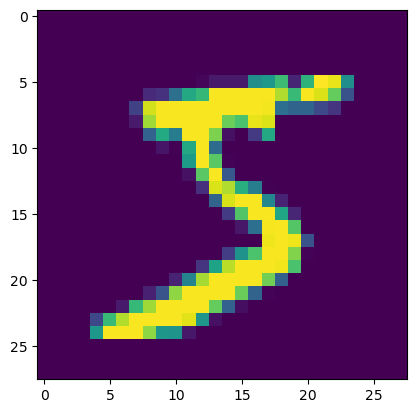

In [11]:
plt.imshow(list(chunks(lst1, 28)))

In [12]:
from itertools import islice 

In [13]:
it = iter(vals)
isit = islice(it, 5)

it = iter([1,2,3,4,5,6,7,8,9])
islice(it, 3)

In [14]:
list(islice(it, 3))

[1, 2, 3]

In [15]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

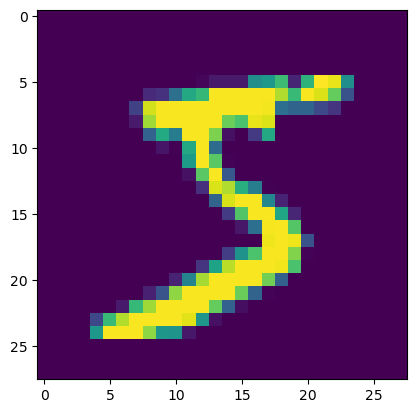

In [16]:
plt.imshow(img)

In [17]:
# MATRIX AND TENSOR

In [18]:
img[20][10]

0.09375

In [19]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [20]:
m = Matrix(img)
m[20, 15]

0.98828125

In [21]:
import torch
from torch import tensor

In [22]:
tensor([[1,2,3]])

tensor([[1, 2, 3]])

In [23]:
tens = tensor(img)
tens[20,15]

tensor(0.9883)

In [24]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
x_train.shape

torch.Size([50000, 784])

In [25]:
x_train.type()

'torch.FloatTensor'

In [26]:
imgs = x_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([50000, 28, 28])

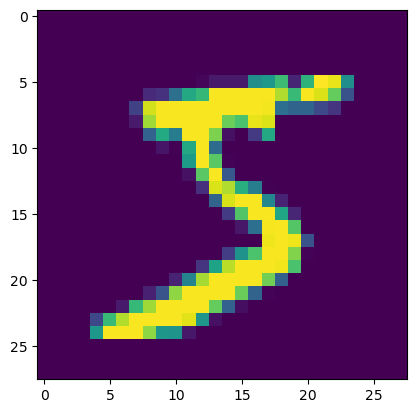

In [27]:
plt.imshow(imgs[0])

In [28]:
# Random numbers
# Wichmann Hill algorithm (as in old python)

rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [29]:
seed(9858273498234912349)
rnd_state

(11450, 9880, 4957)

In [30]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171*x)%30269
    y = (172*y)%30307
    z = (170*z)%30323
    rnd_state = x,y,z 
    return(x/30269 + y/30307 + z/30323) % 1.0

In [31]:
rand(), rand(), rand()

(0.5469819635689908, 0.8149943098239669, 0.2904479573381593)

In [32]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

3.18 ms ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [33]:
%timeit -n 10 torch.randn(784, 10)

34 µs ± 6.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
#
#MATRIX MULTIPLICATION
#

In [34]:
#m1 - 5 byt 784 . # m2 - weights 784 by 10
#####################

#matmul = row1*col1 =  sum(r11*c11*c22*c22...) = r1c1


In [35]:
torch.manual_seed(1)
weights = torch.rand(784, 10)
bias = torch.zeros(10)

In [36]:
m1 = x_valid[:5]
m2 = weights

In [37]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [39]:
ar, ac = m1.shape 
br, bc = m2.shape
(ar,ac), (br,bc)

((5, 784), (784, 10))

In [40]:
t1 = torch.zeros(ar,bc)
t1.shape

torch.Size([5, 10])

In [41]:
for i in range(ar):      #5 
    for j in range(bc):  #10  
        for k in range(ac):  #784
            t1[i,j] += m1[i,k] * m2[k,j]

In [42]:
t1

tensor([[46.6636, 43.0262, 48.5570, 46.9266, 44.9626, 43.0611, 36.7986, 46.3429,
         51.7943, 43.6182],
        [43.3006, 44.5781, 48.1564, 46.7842, 39.7537, 48.0385, 40.7752, 46.8513,
         50.8835, 45.7565],
        [40.5090, 40.6744, 42.5173, 40.5222, 39.4232, 40.5739, 38.8814, 41.3914,
         44.3403, 39.6398],
        [41.0770, 36.0778, 43.2215, 40.4301, 37.2713, 37.2804, 39.5606, 38.0567,
         39.6794, 36.7342],
        [55.4875, 50.5413, 49.9963, 57.0323, 49.8134, 52.8530, 53.3208, 52.9511,
         53.9894, 49.0043]])

In [45]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [44]:
t1

tensor([[46.66, 43.03, 48.56, 46.93, 44.96, 43.06, 36.80, 46.34, 51.79, 43.62],
        [43.30, 44.58, 48.16, 46.78, 39.75, 48.04, 40.78, 46.85, 50.88, 45.76],
        [40.51, 40.67, 42.52, 40.52, 39.42, 40.57, 38.88, 41.39, 44.34, 39.64],
        [41.08, 36.08, 43.22, 40.43, 37.27, 37.28, 39.56, 38.06, 39.68, 36.73],
        [55.49, 50.54, 50.00, 57.03, 49.81, 52.85, 53.32, 52.95, 53.99, 49.00]])

In [46]:
def matmul(a,b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i, k] * b[k, j]
    
    return c

In [47]:
matmul(m1, m2)

tensor([[46.66, 43.03, 48.56, 46.93, 44.96, 43.06, 36.80, 46.34, 51.79, 43.62],
        [43.30, 44.58, 48.16, 46.78, 39.75, 48.04, 40.78, 46.85, 50.88, 45.76],
        [40.51, 40.67, 42.52, 40.52, 39.42, 40.57, 38.88, 41.39, 44.34, 39.64],
        [41.08, 36.08, 43.22, 40.43, 37.27, 37.28, 39.56, 38.06, 39.68, 36.73],
        [55.49, 50.54, 50.00, 57.03, 49.81, 52.85, 53.32, 52.95, 53.99, 49.00]])

In [48]:
%time _=matmul(m1,m2)

CPU times: total: 656 ms
Wall time: 666 ms


In [49]:
#### NUMBA
from numba import njit

In [64]:
@njit
def dot(a,b):
    res = 0.
    for i in range(len(a)): res += a[i]*b[i]
    return res

In [51]:
from numpy import array

In [65]:
%time dot(array([1.2,3]), array([2.,3,4]))

CPU times: total: 31.2 ms
Wall time: 68.5 ms


11.4

In [66]:
%time dot(array([1.2,3]), array([2.,3,4]))

CPU times: total: 0 ns
Wall time: 0 ns


11.4

In [67]:
def matmul_numba(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = dot(a[i,:], b[:,j])
    return c

In [68]:
m1a, m2a = m1.numpy(), m2.numpy()

In [69]:
from fastcore.test import * 

In [70]:
test_close(t1, matmul_numba(m1a, m2a))

AssertionError: close:
tensor([[46.66, 43.03, 48.56, 46.93, 44.96, 43.06, 36.80, 46.34, 51.79, 43.62],
        [43.30, 44.58, 48.16, 46.78, 39.75, 48.04, 40.78, 46.85, 50.88, 45.76],
        [40.51, 40.67, 42.52, 40.52, 39.42, 40.57, 38.88, 41.39, 44.34, 39.64],
        [41.08, 36.08, 43.22, 40.43, 37.27, 37.28, 39.56, 38.06, 39.68, 36.73],
        [55.49, 50.54, 50.00, 57.03, 49.81, 52.85, 53.32, 52.95, 53.99, 49.00]])
tensor([[46.66, 43.03, 48.56, 46.93, 44.96, 43.06, 36.80, 46.34, 51.79, 43.62],
        [43.30, 44.58, 48.16, 46.78, 39.75, 48.04, 40.78, 46.85, 50.88, 45.76],
        [40.51, 40.67, 42.52, 40.52, 39.42, 40.57, 38.88, 41.39, 44.34, 39.64],
        [41.08, 36.08, 43.22, 40.43, 37.27, 37.28, 39.56, 38.06, 39.68, 36.73],
        [55.49, 50.54, 50.00, 57.03, 49.81, 52.85, 53.32, 52.95, 53.99, 49.00]])

In [71]:
%timeit -n 3 matmul(m1a, m2a)

551 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [72]:
%timeit -n 3 matmul_numba(m1a, m2a)

350 µs ± 40.3 µs per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [81]:
######
# try something in numba


59

In [82]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])

a+b

tensor([12., 14.,  3.])

In [83]:
(a<b).float().mean()

tensor(0.67)

In [84]:
m = tensor([[1,.2,3], [4,5,6], [7,8,9]])
m

tensor([[1.00, 0.20, 3.00],
        [4.00, 5.00, 6.00],
        [7.00, 8.00, 9.00]])

In [85]:
# Frobenius norm  
sf = (m*m).sum()
sf

tensor(281.04)

In [86]:
sf.sqrt()

tensor(16.76)

In [89]:
m[2,:]

tensor([7., 8., 9.])

In [96]:
def matmul(a,b):
    (ar, ac), (br,bc) = a.shape, b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = (a[i,:] * b[:, j]).sum()
    return c 

In [97]:
%timeit -n 50 _=matmul(m1, m2)

1 ms ± 4.9 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [98]:
#BORADCASTING
c = tensor([10.,20,30]);c

tensor([10., 20., 30.])

In [99]:
m

tensor([[1.00, 0.20, 3.00],
        [4.00, 5.00, 6.00],
        [7.00, 8.00, 9.00]])

In [100]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [101]:
m+c

tensor([[11.00, 20.20, 33.00],
        [14.00, 25.00, 36.00],
        [17.00, 28.00, 39.00]])

In [104]:
# rules
c

tensor([10., 20., 30.])

In [106]:
c[None, :].shape

torch.Size([1, 3])

In [107]:
c[:, None]

tensor([[10.],
        [20.],
        [30.]])

In [108]:
c[:, None].shape

torch.Size([3, 1])

In [109]:
c[None, :] * c[:, None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [110]:
# MatMul with broadcating

digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [111]:
digit[:, None].shape 

torch.Size([784, 1])

In [114]:
digit[:, None].expand_as(m2).shape 

torch.Size([784, 10])

In [115]:
(digit[:, None]*m2).shape

torch.Size([784, 10])

In [116]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        c[i] = (a[i, :, None] * b).sum(dim=0)
    return c

In [118]:
%timeit -n 50 _=matmul(m1,m2)

202 µs ± 52.9 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [119]:
tr = matmul(x_train, weights)
tr

tensor([[52.78, 50.38, 57.56,  ..., 58.73, 56.32, 51.45],
        [60.74, 57.79, 64.76,  ..., 64.31, 66.09, 56.52],
        [40.03, 39.89, 39.59,  ..., 35.88, 35.26, 37.44],
        ...,
        [46.15, 44.78, 48.35,  ..., 46.48, 50.23, 43.47],
        [43.27, 43.49, 48.87,  ..., 40.92, 46.24, 45.48],
        [51.26, 51.43, 53.72,  ..., 54.96, 56.33, 54.25]])

In [120]:
tr.shape

torch.Size([50000, 10])

In [121]:
%time _=matmul(x_train, weights)

CPU times: total: 2.72 s
Wall time: 1.74 s
